In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met, u_statistics, u_plot
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
msgopen = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_tracking_17_init.csv')

##  Wet / Dry case comparison

Wet: Day 0 / Day -1 > + 0.01% SM anomaly mean (more like 'neutral & wet condition')

Dry: Day  0 < -3% , Day-1 < -1.5% SM anomaly mean

Identified in box + - 90 km and 200km upstream from core centre

In [4]:
msgopen.shape

(7519, 24)

In [5]:
print('Number of ALL cases:', msgopen.shape[0])

Number of ALL cases: 7519


In [6]:
dry = msgopen[(msgopen['SMmean0']<-3)& (msgopen['SMmean-1'] <-1.5) &(msgopen['SMmean0']>-900)& (msgopen['SMmean-1'] >-900) ]

In [7]:
wet = msgopen[(msgopen['SMmean0']>0.01)& (msgopen['SMmean-1'] >0.01)]

In [8]:
dry.head()

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1,initTime,xinit,yinit,xdiff
12,12,12,2006,6,2,17,-0.882174,9.030164,575,187,...,-3.691519,1.0,0.0,-4.139150,1.0,0.0,12.5,928.0,196.0,17.0
16,16,16,2006,6,2,17,-0.567764,9.565561,586,206,...,-4.154485,1.0,0.0,-4.073038,1.0,0.0,12.5,928.0,196.0,15.0
17,17,17,2006,6,2,17,-0.702511,9.743840,581,212,...,-3.593240,1.0,0.0,-4.116375,1.0,0.0,8.0,662.0,330.0,192.0
69,69,69,2006,6,7,17,-5.014425,9.074812,424,188,...,-10.423020,1.0,0.0,-4.209049,1.0,0.0,12.5,611.0,221.0,41.0
70,70,70,2006,6,7,17,-5.014425,9.119454,424,190,...,-10.543681,1.0,0.0,-4.259786,1.0,0.0,12.5,611.0,221.0,43.0


In [9]:
print('Number of dry cases:', dry.shape[0])

Number of dry cases: 353


In [10]:
wet.keys()

Index(['id', 'id.1', 'year', 'month', 'day', 'hour', 'lon', 'lat', 'xloc',
       'yloc', 'area', 'csize', 't', 'storm_id', 'SMmean0', 'SMdry0', 'SMwet0',
       'SMmean-1', 'SMdry-1', 'SMwet-1', 'initTime', 'xinit', 'yinit',
       'xdiff'],
      dtype='object')

In [11]:
print('Number of wet cases:', wet.shape[0])

Number of wet cases: 376


### The dry case shows a shift in the core temperature distribution by -2K

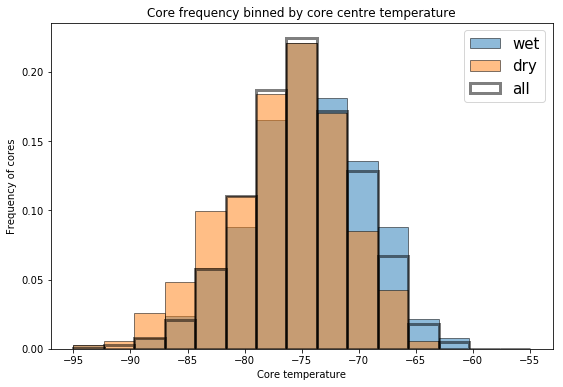

In [14]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.t, alpha=0.5, label='wet', edgecolor='k', bins=15, range=(-95,-55))
u_plot.hist_freq(ax, dry.t, alpha=0.5, label='dry', edgecolor='k', bins=15, range=(-95,-55))
u_plot.hist_freq(ax, msgopen.t, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=15, range=(-95,-55), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Core temperature')
plt.title('Core frequency binned by core centre temperature')
plt.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/coreT.png')

In [22]:
np.percentile(msgopen.t, 10)

-81.38907299963962

In [23]:
np.sum(wet.t<-81.389)/wet.t.size

0.10638297872340426

In [24]:
np.sum(dry.t<-81.389)/wet.t.size

0.19148936170212766

In [158]:
print('Core mean temperature DRY: ', np.mean(np.mean(dry.t)))
print('Core mean temperature WET: ', np.mean(np.mean(wet.t)))

Core mean temperature DRY:  -76.6592853098851
Core mean temperature WET:  -74.68478357861194


In [160]:
print('Core mean temperature DRY: ', np.mean(np.percentile(dry.t,10)))
print('Core mean temperature WET: ', np.mean(np.percentile(wet.t,10)))

Core mean temperature DRY:  -83.76294669728108
Core mean temperature WET:  -81.6095490757735


### We get very few wet cases in June 

Text(0.5, 1.0, 'Core frequency binned by month')

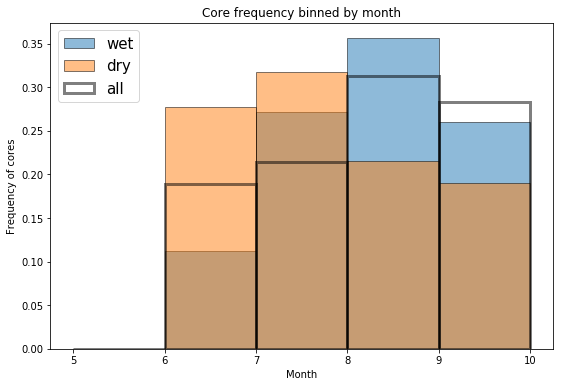

In [149]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.month, alpha=0.5, label='wet', edgecolor='k', bins=5, range=(5,10))
u_plot.hist_freq(ax, dry.month, alpha=0.5, label='dry', edgecolor='k', bins=5, range=(5,10))
u_plot.hist_freq(ax, msgopen.month, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=5, range=(5,10), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Month')
plt.title('Core frequency binned by month')

### The dry cases tend to occur further south - as expected from main occurence during June/July
### The wet case doesn't show such a preference

Text(0.5, 1.0, 'Core frequency binned by latitude')

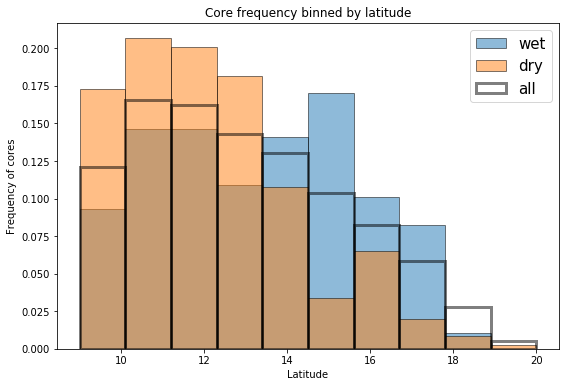

In [154]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.lat, alpha=0.5, label='wet', edgecolor='k', bins=10, range=(9,20))
u_plot.hist_freq(ax, dry.lat, alpha=0.5, label='dry', edgecolor='k', bins=10, range=(9,20))
u_plot.hist_freq(ax, msgopen.lat, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=10, range=(9,20), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Latitude')
plt.title('Core frequency binned by latitude')

In [113]:
topo = xr.open_dataarray(cnst.network_data + 'data/ancils_python/lsta_corr_topo.nc')
topo = topo.sel(lat=slice(9,16))
h = topo.mean(dim='lat')

### Overall core frequency follows topography. Would have to look into dry-core case around 5W

Text(0.5, 1.0, 'Core frequency binned by longitude')

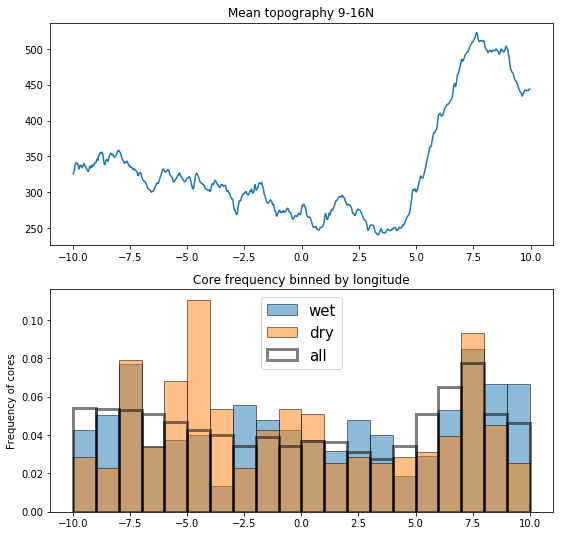

In [156]:
f= plt.figure(figsize=(9,9))

ax = f.add_subplot(211)
ax.plot(h.lon,h)
plt.title('Mean topography 9-16N')

ax = f.add_subplot(212)
u_plot.hist_freq(ax, wet.lon, alpha=0.5, label='wet', edgecolor='k', bins=20, range=(-10,10))
u_plot.hist_freq(ax, dry.lon, alpha=0.5, label='dry', edgecolor='k', bins=20, range=(-10,10))
u_plot.hist_freq(ax, msgopen.lon, alpha=0.5, label='all', edgecolor='k', linewidth=3,  bins=20, range=(-10,10), facecolor='None')
plt.legend(fontsize=15)
#ax.plot(h.lon, h)
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.title('Core frequency binned by longitude')

### Atmospheric conditions associated with the dry case favour shear and therefore organisation into bigger storms? 

Text(0.5,1,'Core frequency binned by storm area')

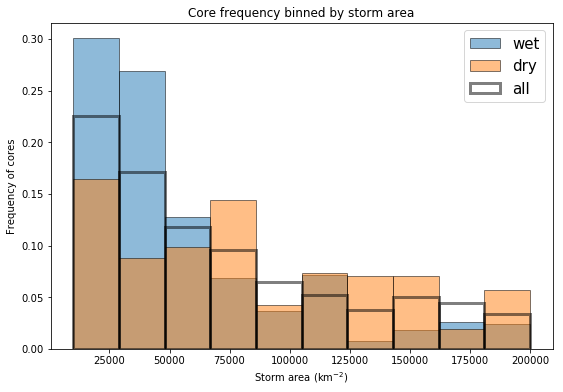

In [25]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.area, alpha=0.5, label='wet', edgecolor='k', bins=10, range=(10000,200000))
u_plot.hist_freq(ax, dry.area, alpha=0.5, label='dry', edgecolor='k', bins=10, range=(10000,200000))
u_plot.hist_freq(ax, msgopen.area, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=10, range=(10000,200000), facecolor='None')

plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Storm area (km$^{-2}$)')
plt.title('Core frequency binned by storm area')

In [29]:
np.mean(wet.area)

64765.6914893617

In [30]:
np.mean(dry.area)

109542.70538243627

In [28]:
(np.mean(dry.area) - np.mean(wet.area)) / np.mean(wet.area)

0.6913693479275144